A notebook (cell) that compares the baseline to the ML version: evaluating results across steps / versions using the Client API.

In [1]:
from metaflow import Flow
name = 'TFlow3'
run = Flow(name).latest_run
print(run.successful)

True


In [2]:
print(run)

Run('TFlow3/37')


In [3]:
run.data.results

[('model_2', 0.7867564534231201), ('model_1', 0.6161616161616161)]

## ML models

In [4]:
import pandas as pd

df = pd.read_csv('../data/titanic.csv')

# Store target variable of training data in a safe place
survived = df.Survived

# 
df = df.drop(['Survived'], axis=1)

# Impute missing numerical variables
df['Age'] = df.Age.fillna(df.Age.median())
df['Fare'] = df.Fare.fillna(df.Fare.median())

# Check out info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
df.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  891 non-null    uint8  
 1   Fare      891 non-null    float64
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.8 KB


In [7]:
X = df.values
y = survived.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [8]:
from sklearn import tree

# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8203389830508474

Index(['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp'], dtype='object')

array([0.60542608, 0.09297003, 0.07800895, 0.19925438, 0.02434057])

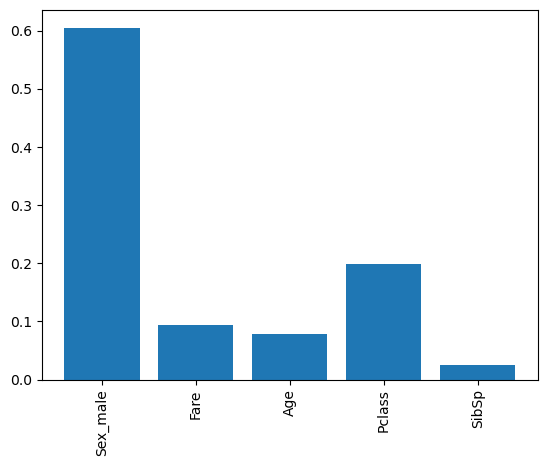

In [9]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
features = df.columns
display(features, importance)

plt.bar(features, importance)
plt.xticks(rotation=90)
plt.show()